Importing packages:

In [14]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

Definerer endowments:

In [15]:
# endowments for consumer a is given:
omega_A1 = 0.8
omega_A2 = 0.3

# enodwments for consumer b:
omega_B1 = round(1 - omega_A1, 1)
omega_B2 = round(1 - omega_A2, 1)

Definerer nyttefunktionerne:

In [16]:
def utility_A(x1, x2, alpha):
    return x1**alpha * x2**(1 - alpha)

def utility_B(x1, x2, beta):
    return x1**beta * x2**(1 - beta)

Definerer efterspørgselsfunktionerne:

In [17]:
def demand_A_x1(p1, p2, omega_A1, omega_A2, alpha):
    return alpha * (p1 * omega_A1 + p2 * omega_A2) / p1

def demand_A_x2(p1, p2, omega_A1, omega_A2, alpha):
    return (1 - alpha) * (p1 * omega_A1 + p2 * omega_A2) / p2

def demand_B_x1(p1, p2, omega_B1, omega_B2, beta):
    return beta * (p1 * omega_B1 + p2 * omega_B2) / p1

def demand_B_x2(p1, p2, omega_B1, omega_B2, beta):
    return (1 - beta) * (p1 * omega_B1 + p2 * omega_B2) / p2

Definerer parametre:

In [18]:
alpha = 1/3
beta = 2/3
N = 75

# Opgave 1

Initial utility er givet ved:

In [19]:
initial_utility_A = utility_A(omega_A1, omega_A2, alpha)
initial_utility_B = utility_B(1 - omega_A1, 1 - omega_A2, beta)

Finder alle mulige allokeringer (men begrænset af N=75)

In [20]:
allocations = [(x1/N, x2/N) for x1 in range(N + 1) for x2 in range(N + 1)]

Filtrerer alle allokeringer der udgør en pareto-fobedring:

In [21]:
pareto_improvements = [] # Laver en tom liste af pareto-fobedringer
for x1, x2 in allocations:
    utility_A_current = utility_A(x1, x2, alpha) #definerer den nuværende utility
    utility_B_current = utility_B(1 - x1, 1 - x2, beta) # definerer den nuværende utility
    if utility_A_current >= initial_utility_A and utility_B_current >= initial_utility_B: # hvis den nuværende utility er større end den initiale, gemmes den i listen ved .append-funktionen forneden
        pareto_improvements.append((x1, x2))

Nu plottes alle allokeringerne (pareto-fobedringer markeret som rød):

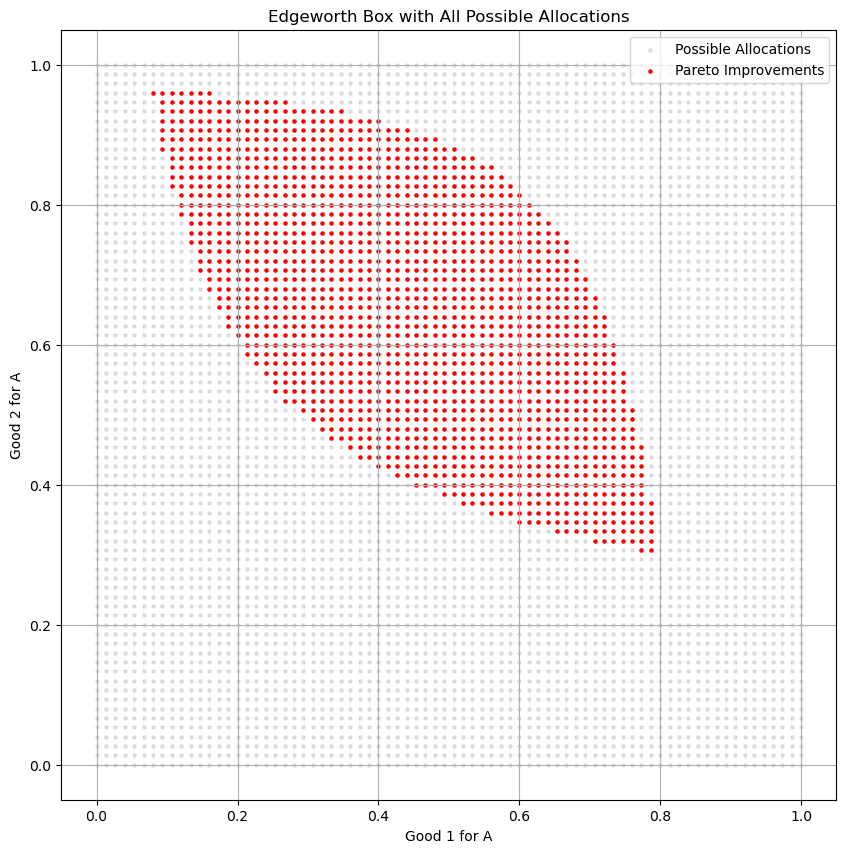

In [22]:

pareto_x1, pareto_x2 = zip(*pareto_improvements) # laver en tuple af pareto-fobedringer med .zip-funktionen
all_x1, all_x2 = zip(*allocations) # Samme som foroven

plt.figure(figsize=(10, 10))
plt.scatter(all_x1, all_x2, color='grey', s=5, alpha=0.2, label="Possible Allocations")
plt.scatter(pareto_x1, pareto_x2, color='red', s=5, label="Pareto Improvements")
plt.xlabel("Good 1 for A")
plt.ylabel("Good 2 for A")
plt.title("Edgeworth Box with All Possible Allocations")
plt.legend()
plt.grid(True)
plt.show()

# Opgave 2

Nu beregnes fejlen i markedsclearingsprisen.